In [1453]:
import pandas as pd
import numpy as np      #logaritamska transformacija outliera
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [1454]:
kreditna_procjena = pd.read_csv ("projektbanka.csv")

#### Zadatak: Istražiti koje varijable imaju stvarni i korisni utjecaj na zavisnu varijablu 'Odobreni_Iznos_EUR'

→ Proces procjene kreditne sposobnosti klijenta

DSTI omjer (Debt Service to Income) je financijski pokazatelj koji se koristi prilikom procjene 
kreditne sposobnosti klijenta, najčešće u kontekstu odobravanja stambenih i potrošačkih kredita.

DSTI = (Ukupne mjesečne obveze / Ukupni mjesečni neto prihodi) x 100
DSTI ne smije biti veći od 45% (regulatorni zahtjev središnje banke (HNB-a)

→ Zašto je DSTI važan?
Procjena kreditne sposobnosti: pokazuje može li osoba redovno servisirati kredit
Zaštita klijenata i banaka: smanjuje rizik prekomjernog zaduženja i neotplate kredita


#### Feature selection (izbor najvažnijih varijabli) 

Proces tijekom eksplorativne analize.
Treba odabrati najutjecajnije varijable za izradu modela. Varijable koje nam nisu zanimljive se isključuju iz modela.

Cilj feature selectiona: 
- bolja točnost (i love fidelity)
- manja složenost (simple is beautiful)
- brže izvođenje (time is money)   

In [1455]:
kreditna_procjena.head()

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28.0,12.0,9.0,2.0,muško,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34.0,13.0,23.0,3.0,žensko,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27.0,11.0,16.0,2.0,muško,podstanar,magisterij
3,1004,Hrvatska,115460.60,9433.69,39059.44,32.0,17.0,30.0,4.0,f,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18.0,10.0,NaN,2.0,f,podstanar,SSS


In [1456]:
kreditna_procjena.tail()

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
2015,2658,Hrvatska,111351.95,7401.28,27290.05,18.0,2.0,9.0,1.0,f,podstanar,SSS
2016,1873,Hrvatska,57413.62,3205.30,45000.00,18.0,0.0,8.0,6.0,žensko,podstanar,SSS
2017,2703,Hrvatska,97694.43,9542.15,45000.00,26.0,13.0,25.0,1.0,m,vlasnik,magisterij
2018,1528,Hrvatska,85961.70,6112.71,45000.00,41.0,19.0,21.0,4.0,M,vlasnik,SSS
2019,2092,Hrvatska,84255.56,NaN,45000.00,43.0,18.0,17.0,5.0,NaN,vl,SSS


In [1457]:
kreditna_procjena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2020 non-null   int64  
 1   Država                     2020 non-null   object 
 2   Odobreni_Iznos_EUR         2020 non-null   float64
 3   Mjesečna_Primanje_EUR      1919 non-null   float64
 4   Trenutni_Dug_EUR           1919 non-null   float64
 5   Starost_Klijenta           1919 non-null   float64
 6   Staž_Godine                1919 non-null   float64
 7   Godine_Kreditne_Povijesti  1919 non-null   float64
 8   Broj_članova_Kućanstva     1919 non-null   float64
 9   Spol                       1919 non-null   object 
 10  Stambeni_Status            1919 non-null   object 
 11  Obrazovanje                1919 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 189.5+ KB


In [1458]:
kreditna_procjena.nunique()

ID_Klijenta                  2000
Država                          1
Odobreni_Iznos_EUR           2000
Mjesečna_Primanje_EUR        1848
Trenutni_Dug_EUR              257
Starost_Klijenta               51
Staž_Godine                    36
Godine_Kreditne_Povijesti      31
Broj_članova_Kućanstva         13
Spol                            5
Stambeni_Status                 3
Obrazovanje                     3
dtype: int64


#### Osnovne informacije o datasetu:

- 12 stupaca, 2020 redaka, 20 duplikata, 101 missing values u svakom od 9 stupaca (#3-#11);

→ Četiri kategorijske varijable se mogu pretvoriti u brojčane 
- Država, Spol, Stambeni_Status, Obrazovanje 

In [1459]:
kreditna_procjena.describe()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
count,2020.000000,2020.000000,1919.000000,1919.00000,1919.000000,1919.000000,1919.000000,1919.000000
mean,2000.603465,85929.815401,6694.880573,43534.26522,35.178739,15.392392,15.137051,2.647212
std,576.920116,19750.659531,1838.166648,5928.30992,9.854248,5.660518,8.801156,1.587254
min,1001.000000,20174.650000,1644.560000,0.00000,12.000000,0.000000,0.000000,-5.000000
25%,1502.750000,72694.725000,5467.530000,45000.00000,28.000000,11.000000,8.000000,1.000000
50%,2002.500000,85893.835000,6618.190000,45000.00000,35.000000,15.000000,15.000000,2.000000
75%,2498.250000,98722.072500,7935.160000,45000.00000,42.000000,19.000000,23.000000,4.000000
max,3000.000000,150000.000000,19246.942762,96932.52968,100.000000,37.000000,30.000000,9.000000



#### Outlieri primjećeni:

→ Starost_Klijenta: od 12 do 100 godina (klijent iz dječje štedionice je završio u datasetu?);
mean (prosjek) = 35.17 god; 
standardna devijacija = 9,85 god

→ Mjesečna_Primanje_EUR: izgledaju nerealno, treba provjeriti distribuciju
mean (prosjek) = 6,694.88 eura 
max 19,246.94 eura

→ Broj_članova_Kućanstva: -5, ne može biti negativan broj

#### Kategorijske varijable (object)
→ pogodne su za pretvaranje u integer varijable

In [1460]:
kreditna_procjena.Država.value_counts()

Država
Hrvatska    2020
Name: count, dtype: int64

In [1461]:
kreditna_procjena.Spol.value_counts()

Spol
muško     725
M         418
m         365
f         221
žensko    190
Name: count, dtype: int64


#### Pogrešni upisi:

- Varijabla Spol: prvo očistiti od varijanti musko i zensko (muško/m/M i žensko/f)
- potom kategorijsku varijablu transformirati u numeričku - LabelEncoder()

In [1462]:
kreditna_procjena ['Spol'] = kreditna_procjena ['Spol'].replace({
    'm': 'musko',
    'M': 'musko',
    'muško': 'musko',
    'f': 'zensko',
    'ž': 'zensko',
    'žensko': 'zensko'
})

In [1463]:
kreditna_procjena.Spol.value_counts()

Spol
musko     1508
zensko     411
Name: count, dtype: int64

In [1464]:
kreditna_procjena.Stambeni_Status.value_counts()

Stambeni_Status
podstanar    1169
vl            384
vlasnik       366
Name: count, dtype: int64

In [1465]:
kreditna_procjena ['Stambeni_Status'] = kreditna_procjena ['Stambeni_Status'].replace({
    'vl': 'vlasnik',
})

In [1466]:
kreditna_procjena.Stambeni_Status.value_counts()

Stambeni_Status
podstanar    1169
vlasnik       750
Name: count, dtype: int64

In [1467]:
kreditna_procjena.Obrazovanje.value_counts() 

Obrazovanje
SSS           978
VSS           663
magisterij    278
Name: count, dtype: int64

→ Dropanje varijable 'Država'
Ako varijabla ima istu vrijednost za sve ili gotovo sve redove, ne doprinosi modeliranju.
Ako je stupac Država uvijek "Hrvatska", nema informativne vrijednosti.

→ Dropanje varijable jedinstveni identifikator 'ID_Klijenta'
Nije relevantna za problem, ne doprinosi rješavanju cilja analize.
Ne pridonosi predikciji – bolje ga je ukloniti kako model ne bi “naučio” beskorisne uzorke

In [1468]:
kreditna_procjena = kreditna_procjena.drop(['Država', 'ID_Klijenta'], axis=1)    # axis=1: brisanje stupca


#### Duplikati:

→ Kvare podatke, najbolje ih je izostaviti .drop() 

In [1469]:
kreditna_procjena.duplicated().sum()

12

In [1470]:
kreditna_procjena.drop_duplicates(inplace=True)

In [1471]:
missing_values = kreditna_procjena.isnull().sum()

In [1472]:
missing_values

Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR        101
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

#### Radim kopiju dataseta

In [1473]:
kreditna_procjena2 = kreditna_procjena.copy()

In [1474]:
kreditna_procjena2.dropna(thresh = 8 , inplace=True)  # dozvoljen je 2 NaN

In [1475]:
missing_values = kreditna_procjena2.isnull().sum()

In [1476]:
missing_values

Odobreni_Iznos_EUR            0
Mjesečna_Primanje_EUR        96
Trenutni_Dug_EUR             99
Starost_Klijenta             95
Staž_Godine                  97
Godine_Kreditne_Povijesti    94
Broj_članova_Kućanstva       95
Spol                         97
Stambeni_Status              94
Obrazovanje                  97
dtype: int64

In [1477]:
kreditna_procjena2.corr(numeric_only=True)

,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
Odobreni_Iznos_EUR,1.000000,0.678611,-0.462449,-0.014730,0.104804,0.031631,0.036067
Mjesečna_Primanje_EUR,0.678611,1.000000,-0.298848,0.008522,0.090930,0.030109,0.038405
Trenutni_Dug_EUR,-0.462449,-0.298848,1.000000,-0.023371,-0.081107,-0.036166,0.016910
Starost_Klijenta,-0.014730,0.008522,-0.023371,1.000000,0.813651,0.012574,0.012338
Staž_Godine,0.104804,0.090930,-0.081107,0.813651,1.000000,0.011312,-0.009539
Godine_Kreditne_Povijesti,0.031631,0.030109,-0.036166,0.012574,0.011312,1.000000,0.003239
Broj_članova_Kućanstva,0.036067,0.038405,0.016910,0.012338,-0.009539,0.003239,1.000000


#### Analiza korelacijskih odnosa

→ najjača je korelacija Odobrenog_Iznosa i Mjesečnih_Primanja = 0.68 (značajna, očekivano)
→ sljedeća bitna je negativna korelacija Odobrenog_Iznosa i Trenutnog_Duga = -0.46 (značajna, očekivano)
→ vrijedna spomena je korelacija Odobrenog_Iznosa i Staž_Godine = 0.11 (umjereno korisna)
→ Starost_Klijenta	−0.01 (zanemariva)
→ Godine_Kreditne_Povijesti	+0.03 (zanemariva)
→ Broj_članova_Kućanstva	+0.03 (zanemariva)

Godine_Kreditne_Povijesti - može se izbaciti
Broj_članova_Kućanstva - može se izbaciti


#### Otkrivanje outlinera

→ Vizualno: Boxplot ili Histogram/Scatterplot
→ Statistički: IQR metoda (Interkvartilni raspon) ili Z-score (više od 3 std od medijana)

Kad ih identificiramo možemo ih ukloniti, zamijeniti s meanom (imputacija)
ili ih transformirati uz pomoć logaritamske skale

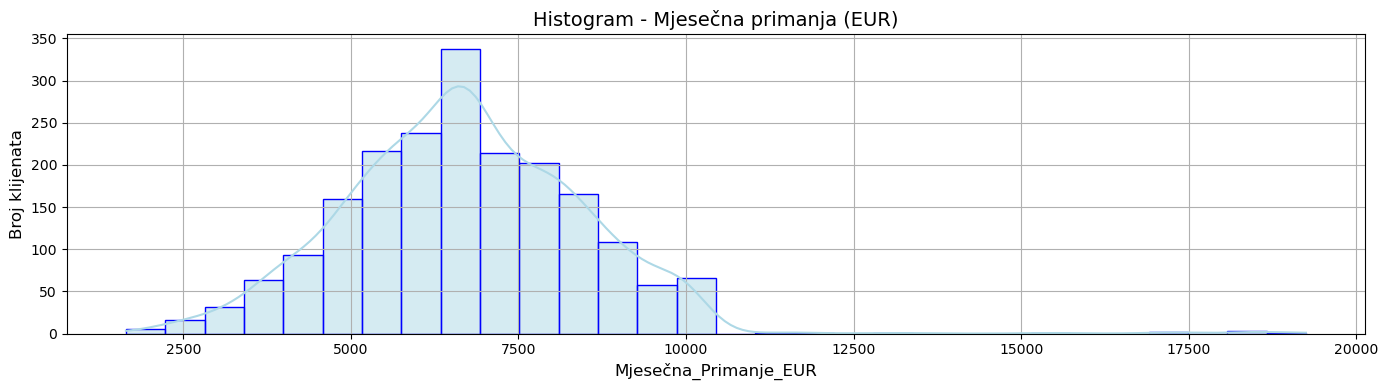

In [1531]:
plt.figure(figsize=(14, 4))
sns.histplot(kreditna_procjena2["Mjesečna_Primanje_EUR"], bins=30, kde=True, color='lightblue', edgecolor='blue')
plt.title("Histogram - Mjesečna primanja (EUR)", fontsize=14)
plt.xlabel("Mjesečna_Primanje_EUR", fontsize=12)
plt.ylabel("Broj klijenata", fontsize=12)
plt.grid(True)
plt.tight_layout()

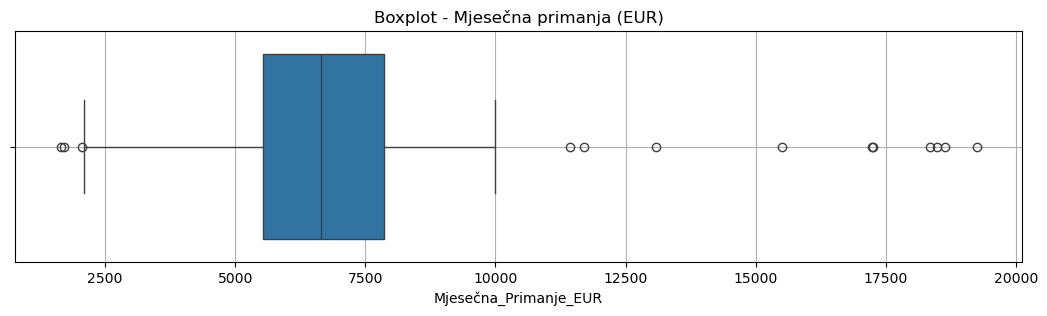

In [1529]:
plt.figure(figsize = (13, 3))  # Veličina grafa
sns.boxplot(x = kreditna_procjena2["Mjesečna_Primanje_EUR"])
plt.title("Boxplot - Mjesečna primanja (EUR)", fontsize=12)
plt.grid(True)

→ Objašnjenje Boxplota:

Središnji dio (kutija) prikazuje 50% srednjih vrijednosti (između 1. i 3. kvartila).
Linija unutar kutije je medijan.
Točke izvan "brkova" su outlieri – ekstremno niske ili visoke plaće u odnosu na ostatak.

→ Zaključak: Postoji nekoliko outliera s vrlo visokim primanjima koji značajno odskaču od većine korisnika.

Identificirajmo koji redovi sadrže outliere.

In [1480]:
# IQR metoda za otkrivanje outliera
Q1 = kreditna_procjena2["Mjesečna_Primanje_EUR"].quantile(0.25)
Q3 = kreditna_procjena2["Mjesečna_Primanje_EUR"].quantile(0.75)
IQR = Q3 - Q1

In [1481]:
# Definiranje granica
donja_granica = Q1 - 1.5 * IQR
gornja_granica = Q3 + 1.5 * IQR

In [1482]:
outlieri = kreditna_procjena2[(kreditna_procjena2["Mjesečna_Primanje_EUR"] < donja_granica) | (kreditna_procjena2["Mjesečna_Primanje_EUR"] > gornja_granica)]

In [1483]:
outlieri[["Mjesečna_Primanje_EUR"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 403 to 2000
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mjesečna_Primanje_EUR  11 non-null     float64
dtypes: float64(1)
memory usage: 176.0 bytes


In [1484]:
outlieri[["Mjesečna_Primanje_EUR"]].head(11)

,Mjesečna_Primanje_EUR
403,11698.402763
406,13078.671541
579,17240.618424
668,1703.960000
720,15501.440919
959,18645.758565
1077,19246.942762
1473,18342.513107
1591,1644.560000
1678,18494.558808


#### Poslovna prilika
Klijenti - outlieri su možda VIP klijenti kojima treba nuditi dodatne usluge 
→ proslijediti informaciju Odjelu prodaje

In [1485]:
outlier_index = [403, 406, 579, 668, 720, 959, 1077, 1473, 1591, 1678, 2000]

→ Na mjesto missing values za 'Mjesečna_Primanje_EUR' stavit ćemo mean bez outliera.
Ova varijabla ima najveću korelaciju u analizi, moram pažljivo odrediti optimalno rješavanje missing values.

In [1486]:
mean_bezOutlier = kreditna_procjena2.drop(outlier_index)['Mjesečna_Primanje_EUR'].mean()

In [1487]:
mean_bezOutlier

6649.127846432152

In [1488]:
kreditna_procjena2.fillna({'Mjesečna_Primanje_EUR': 6649.128}, inplace=True)

In [1489]:
missing_values = kreditna_procjena2.isnull().sum()

In [1490]:
missing_values # nema ih više u Mjesečna_Primanja

Odobreni_Iznos_EUR            0
Mjesečna_Primanje_EUR         0
Trenutni_Dug_EUR             99
Starost_Klijenta             95
Staž_Godine                  97
Godine_Kreditne_Povijesti    94
Broj_članova_Kućanstva       95
Spol                         97
Stambeni_Status              94
Obrazovanje                  97
dtype: int64

#### Što se postiže log-transformacijom?

→ Smanjena varijabilnost → outlieri sada manje odskaču
→ Distribucija je “normalnija” – pogodnija za modele koji pretpostavljaju normalnu raspodjelu (npr. linearna regresija)
→ Manji utjecaj ekstremno velikih primanja

In [1491]:
# Kreiranje nove kolone s logaritamski transformiranim primanjima
kreditna_procjena2["Log_Primanje"] = np.log(kreditna_procjena2["Mjesečna_Primanje_EUR"])

In [1492]:
# Prikaz osnovnih statistika stare i nove kolone
kreditna_procjena2[["Mjesečna_Primanje_EUR", "Log_Primanje"]].describe()

,Mjesečna_Primanje_EUR,Log_Primanje
count,1993.000000,1993.000000
mean,6689.123321,8.770832
std,1793.995978,0.281322
min,1644.560000,7.405228
25%,5534.790000,8.618809
50%,6649.128000,8.802241
75%,7851.220000,8.968424
max,19246.942762,9.865108


#### Dobila sam slične rezultate za mean 'Mjesečna_Primanja' koristeći dvije metode:
→ 6649.1278 računanjem meana na datasetu bez outliera
→ 6689.1233 log-transformacijom
→ 6694.8805 .describe() na početku analize, s NaN

#### Riješit ću missing values u preostalim stupcima:

→ Trenutni_Dug_EUR - mean
→ Starost_Klijenta - mean
→ Staž_Godine - mean
→ Godine_Kreditne_Povijesti - mean
→ Broj_članova_Kućanstva - mean
→ Spol - mod
→ Stambeni_Status - mod
→ Obrazovanje - mod

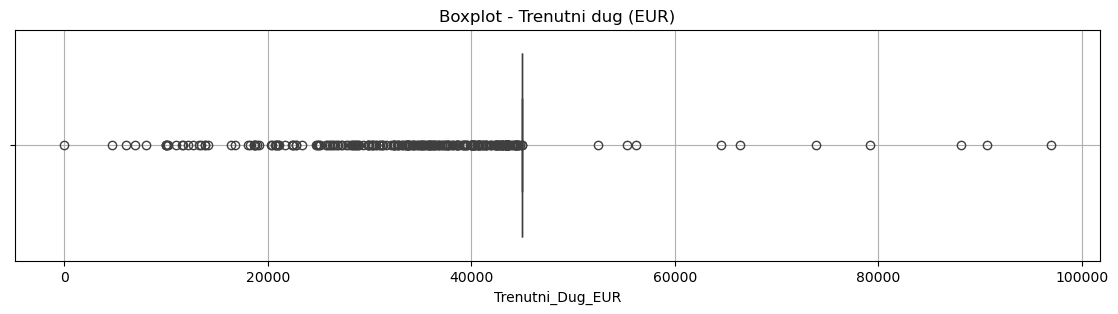

In [1525]:
plt.figure(figsize = (14, 3))
sns.boxplot(x = kreditna_procjena2['Trenutni_Dug_EUR'])
plt.title('Boxplot - Trenutni dug (EUR)', fontsize=12)
plt.grid(True)

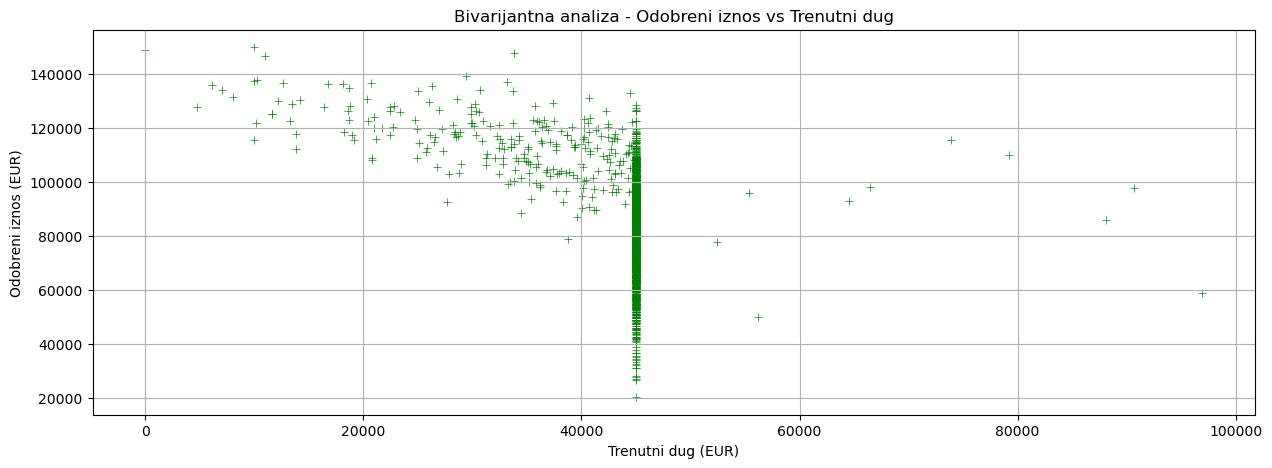

In [1494]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Trenutni_Dug_EUR', y='Odobreni_Iznos_EUR', data=kreditna_procjena2, color='green', marker='+')
plt.title('Bivarijantna analiza - Odobreni iznos vs Trenutni dug', fontsize=12)
plt.xlabel('Trenutni dug (EUR)')
plt.ylabel('Odobreni iznos (EUR)')
plt.grid(True)

#### Postoji umjerena negativna korelacija između trenutnog duga i odobrenog iznosa, koja je statistički značajna.

- gledamo postoje li veze među varijablama i kakve su ako postoje
- postoje li outlieri


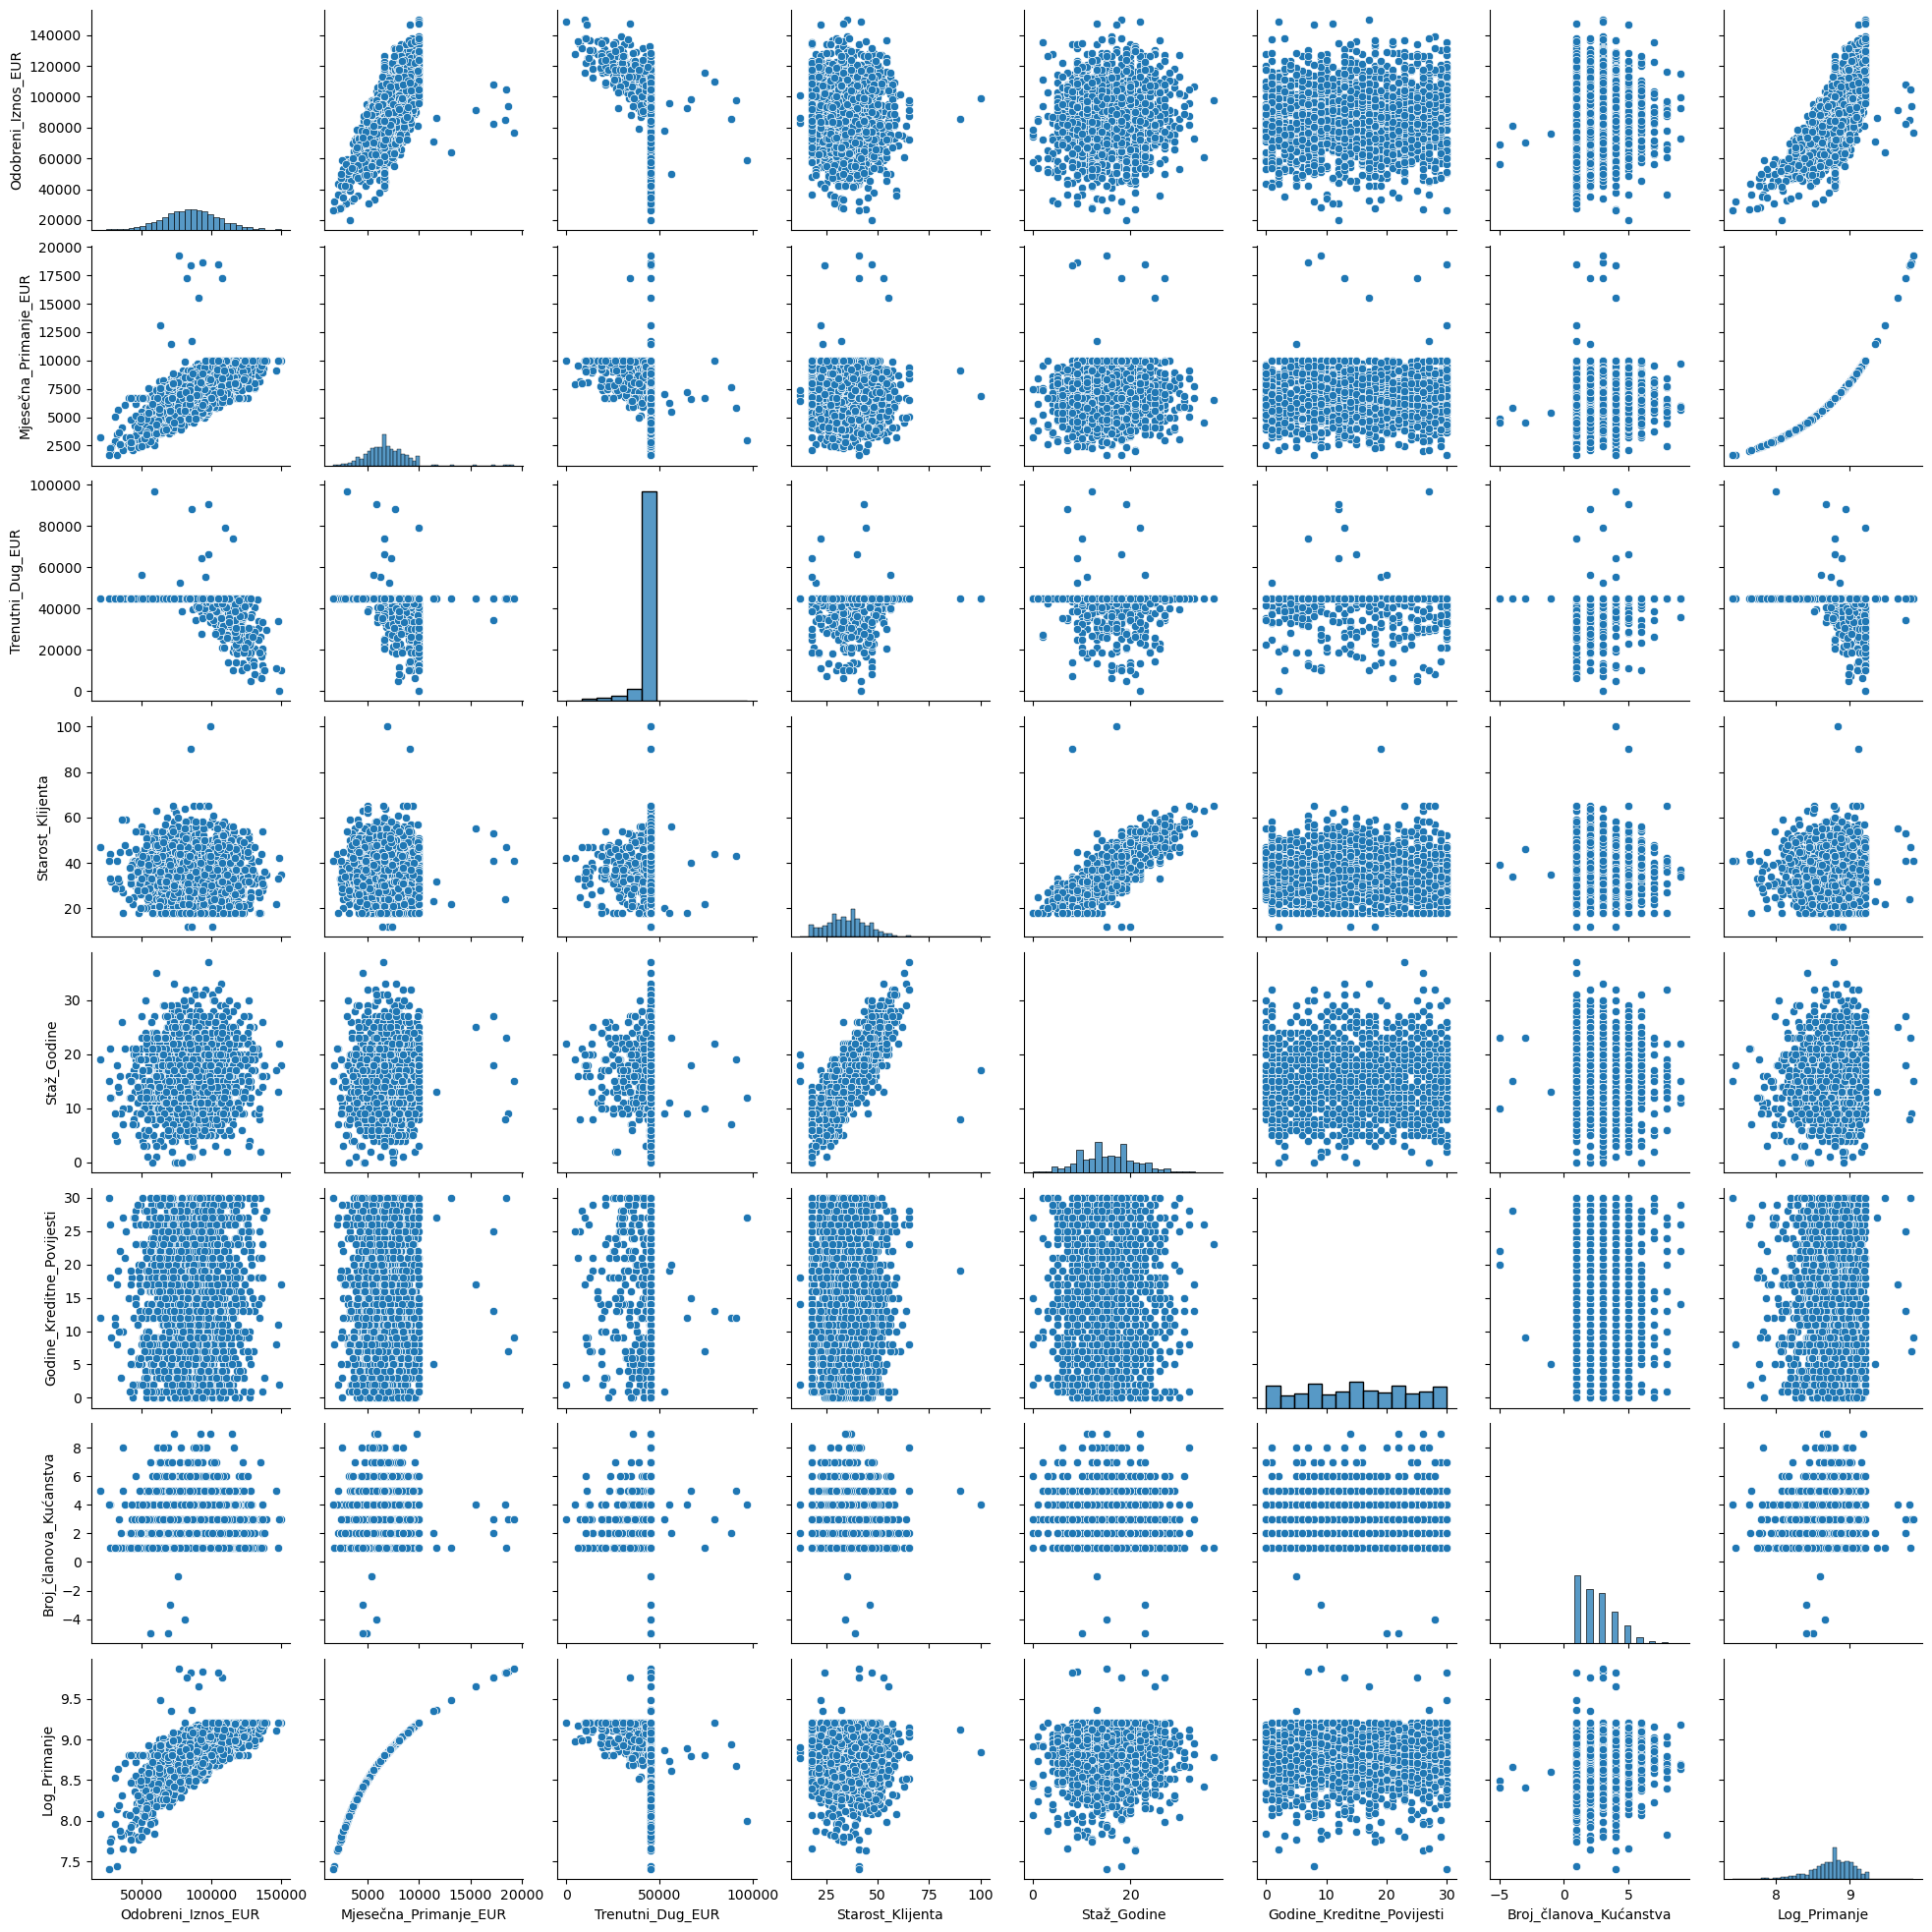

In [1495]:
sns.pairplot (kreditna_procjena2)

#### Pairplot - samo varijabli koje su zanimljive zbog korelacije

In [1496]:
cols_to_plot = ['Odobreni_Iznos_EUR', 'Log_Primanje', 'Staž_Godine', 'Starost_Klijenta']

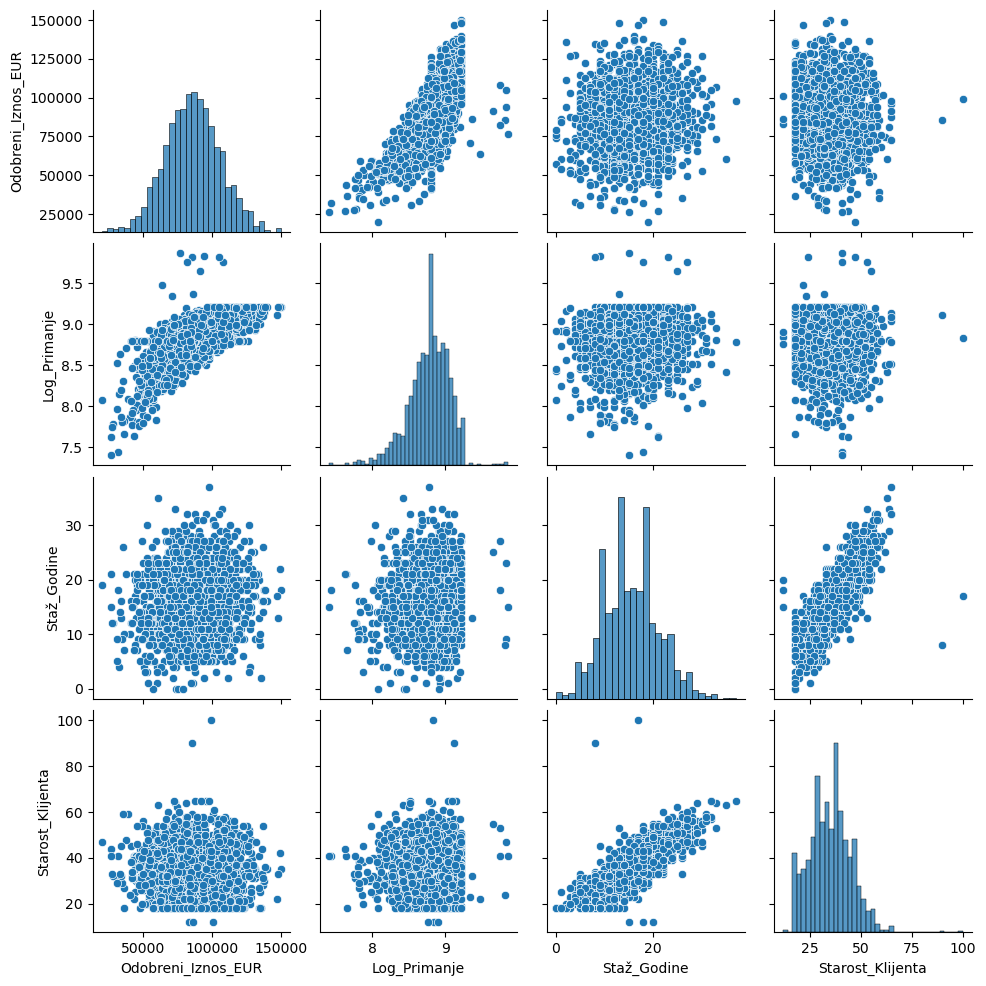

In [1497]:
sns.pairplot(kreditna_procjena2[cols_to_plot])

#### Rješavanje missing values u preostalim varijablama
→ imputacija

In [1498]:
Trenutni_Dug_prosjek = kreditna_procjena2['Trenutni_Dug_EUR'].mean()
Trenutni_Dug_prosjek

43546.483657042336

In [1499]:
kreditna_procjena2.fillna({'Trenutni_Dug_EUR': 43546.484}, inplace=True)

In [1500]:
Starost_Klijenta_prosjek = kreditna_procjena2['Starost_Klijenta'].mean()
Starost_Klijenta_prosjek

35.19599578503688

In [1501]:
kreditna_procjena2.fillna({'Starost_Klijenta': 35.196}, inplace=True)

In [1502]:
Staž_Godine_prosjek = kreditna_procjena2['Staž_Godine'].mean()
Staž_Godine_prosjek

15.390295358649789

In [1503]:
kreditna_procjena2.fillna({'Staž_Godine': 15.390}, inplace=True)

In [1504]:
Godine_Kreditne_Povijesti_prosjek = kreditna_procjena2['Godine_Kreditne_Povijesti'].mean()
Godine_Kreditne_Povijesti_prosjek

15.145866245392313

In [1505]:
kreditna_procjena2.fillna({'Godine_Kreditne_Povijesti': 16.091}, inplace=True)

In [1506]:
Broj_članova_Kućanstva_prosjek = kreditna_procjena2['Broj_članova_Kućanstva'].mean().round()
Broj_članova_Kućanstva_prosjek

3.0

In [1507]:
kreditna_procjena2.fillna({'Broj_članova_Kućanstva': 3}, inplace=True)  

In [1508]:
kreditna_procjena2['Spol'].mode()

0    musko
Name: Spol, dtype: object

In [1509]:
kreditna_procjena2.fillna({'Spol': 'musko'}, inplace=True)   # mode

In [1510]:
kreditna_procjena2['Stambeni_Status'].mode()

0    podstanar
Name: Stambeni_Status, dtype: object

In [1511]:
kreditna_procjena2.fillna({'Stambeni_Status': 'podstanar'}, inplace=True)   # mode

In [1512]:
kreditna_procjena2['Obrazovanje'].mode()   # kategoričke varijable

0    SSS
Name: Obrazovanje, dtype: object

In [1513]:
kreditna_procjena2['Obrazovanje'].mode()

0    SSS
Name: Obrazovanje, dtype: object

In [1514]:
kreditna_procjena2.fillna({'Obrazovanje': 'SSS'}, inplace=True)   # mode

In [1515]:
missing_values = kreditna_procjena2.isnull().sum()

In [1516]:
missing_values

Odobreni_Iznos_EUR           0
Mjesečna_Primanje_EUR        0
Trenutni_Dug_EUR             0
Starost_Klijenta             0
Staž_Godine                  0
Godine_Kreditne_Povijesti    0
Broj_članova_Kućanstva       0
Spol                         0
Stambeni_Status              0
Obrazovanje                  0
Log_Primanje                 0
dtype: int64


#### Filtriranje outliera

Imamo među klijentima 12-godišnjaka. Pravno, osobe mlađe od 18 godina ne mogu sklapati ugovore o kreditu. Treba ih filtrirati.


In [1517]:
kreditna_procjena2 = kreditna_procjena2[kreditna_procjena2['Starost_Klijenta'] >= 18]


#### Još outliera

Broj_članova_Kućanstva ima neg. vrijednosti (-5). Treba filtrirati takve retke i ukloniti.

In [1518]:
kreditna_procjena2 = kreditna_procjena2[kreditna_procjena2['Broj_članova_Kućanstva'] >= 1]

<Axes: xlabel='Mjesečna_Primanje_EUR', ylabel='Odobreni_Iznos_EUR'>

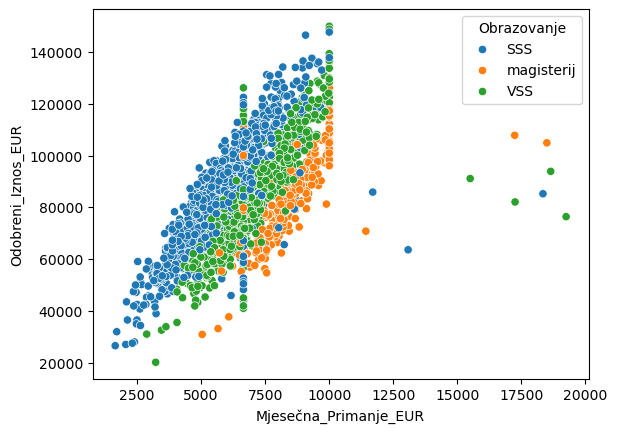

In [1519]:
sns.scatterplot (data = kreditna_procjena2, x = "Mjesečna_Primanje_EUR", y = "Odobreni_Iznos_EUR", hue = "Obrazovanje")

<Axes: xlabel='Mjesečna_Primanje_EUR', ylabel='Odobreni_Iznos_EUR'>

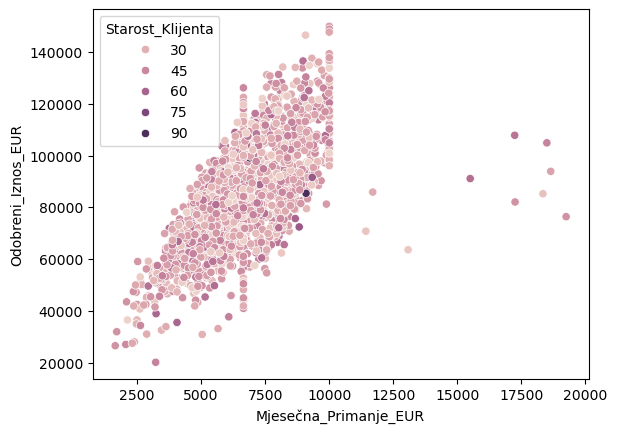

In [1520]:
sns.scatterplot (data = kreditna_procjena2, x = "Mjesečna_Primanje_EUR", y = "Odobreni_Iznos_EUR", hue = "Starost_Klijenta")

In [1521]:
kreditna_procjena2.describe()

,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Log_Primanje
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,85936.798897,6693.003445,43540.625674,35.224395,15.383290,15.192219,2.674055,8.771372
std,19726.839843,1795.383726,5778.855113,9.601030,5.514832,8.592639,1.513733,0.281532
min,20174.650000,1644.560000,0.000000,18.000000,0.000000,0.000000,1.000000,7.405228
25%,72583.050000,5542.000000,45000.000000,29.000000,12.000000,8.000000,1.000000,8.620111
50%,85876.230000,6649.128000,45000.000000,35.196000,15.390000,16.000000,3.000000,8.802241
75%,98721.030000,7856.590000,45000.000000,41.000000,19.000000,22.000000,4.000000,8.969108
max,150000.000000,19246.942762,96932.529680,100.000000,37.000000,30.000000,9.000000,9.865108


In [1522]:
kreditna_procjena2.corr(numeric_only=True)

,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Log_Primanje
Odobreni_Iznos_EUR,1.000000,0.658989,-0.452821,-0.013087,0.102439,0.032204,0.025365,0.694471
Mjesečna_Primanje_EUR,0.658989,1.000000,-0.287200,0.009485,0.087324,0.029849,0.025966,0.968848
Trenutni_Dug_EUR,-0.452821,-0.287200,1.000000,-0.020820,-0.077773,-0.034846,0.020015,-0.268467
Starost_Klijenta,-0.013087,0.009485,-0.020820,1.000000,0.773303,0.011181,0.014035,0.001303
Staž_Godine,0.102439,0.087324,-0.077773,0.773303,1.000000,0.011531,-0.007197,0.088309
Godine_Kreditne_Povijesti,0.032204,0.029849,-0.034846,0.011181,0.011531,1.000000,0.006810,0.026297
Broj_članova_Kućanstva,0.025365,0.025966,0.020015,0.014035,-0.007197,0.006810,1.000000,0.027924
Log_Primanje,0.694471,0.968848,-0.268467,0.001303,0.088309,0.026297,0.027924,1.000000


In [1523]:
label_encoder = LabelEncoder()
kreditna_procjena2['Spol_Label'] = label_encoder.fit_transform (kreditna_procjena2['Spol'])
kreditna_procjena2['Obraz_Label'] = label_encoder.fit_transform (kreditna_procjena2['Obrazovanje'])
kreditna_procjena2['Stambeni_Label'] = label_encoder.fit_transform (kreditna_procjena2['Stambeni_Status'])

<Axes: >

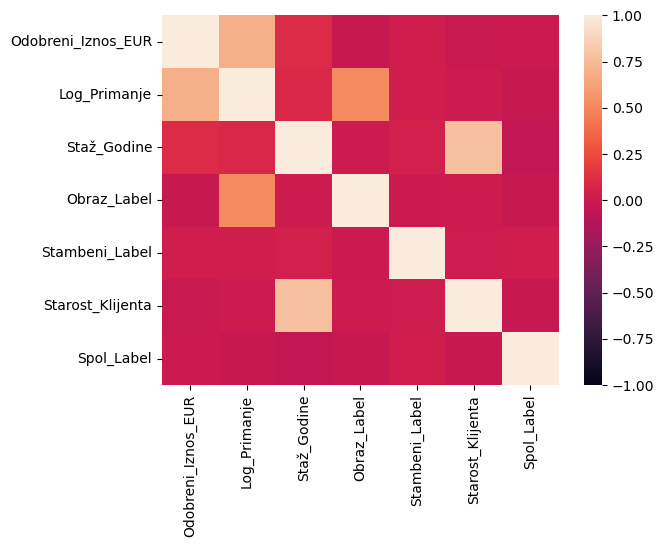

In [1524]:
cols_to_plot2=['Odobreni_Iznos_EUR','Log_Primanje','Staž_Godine','Obraz_Label','Stambeni_Label','Starost_Klijenta','Spol_Label']
sns.heatmap(kreditna_procjena2[cols_to_plot2].corr(), vmin=-1, vmax=1)

#### Zaključak:

Najveći značaj na nezavisnu varijablu Odobreni iznos imaju varijable:

1. Mjesečna primanja (značajan pozitivan utjecaj)
2. Trenutni dug (značajan negativan)
3. Staž (umjereno značajan pozitivan)
4. Starost (umjereno značajan negativan)



                            *******   H V A L A   *******